# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | deep river.
Processing Record 1  of Set 1 | tual.
Processing Record 2  of Set 1 | bredasdorp.
Processing Record 3  of Set 1 | butaritari.
Processing Record 4  of Set 1 | cape town.
Processing Record 5  of Set 1 | punta arenas.
Processing Record 6  of Set 1 | busselton.
Processing Record 7  of Set 1 | chatellerault.
Processing Record 8  of Set 1 | gravdal.
Processing Record 9  of Set 1 | lebu.
Processing Record 10  of Set 1 | mao.
Processing Record 11  of Set 1 | carnarvon.
Processing Record 12  of Set 1 | ilhabela.
Processing Record 13  of Set 1 | richards bay.
Processing Record 14  of Set 1 | kavieng.
Processing Record 15  of Set 1 | avarua.
Processing Record 16  of Set 1 | saint-philippe.
Processing Record 17  of Set 1 | mumford.
Processing Record 18  of Set 1 | rikitea.
Processing Record 19  of Set 1 | halifax.
Processing Record 20  of Set 1 | klaksvik.
Processing Record 21  of Set 1 | tianpeng.
P

Processing Record 24  of Set 4 | ponta delgada.
Processing Record 25  of Set 4 | bichena.
Processing Record 26  of Set 4 | new norfolk.
Processing Record 27  of Set 4 | portland.
Processing Record 28  of Set 4 | icod de los vinos.
Processing Record 29  of Set 4 | rawson.
Processing Record 30  of Set 4 | nokaneng.
Processing Record 31  of Set 4 | sapernoye.
Processing Record 32  of Set 4 | lagos.
Processing Record 33  of Set 4 | tarudant.
City not found...skipping tarudant.
Processing Record 34  of Set 4 | fortuna.
Processing Record 35  of Set 4 | beringovskiy.
Processing Record 36  of Set 4 | yulara.
Processing Record 37  of Set 4 | half moon bay.
Processing Record 38  of Set 4 | puerto leguizamo.
Processing Record 39  of Set 4 | touros.
Processing Record 40  of Set 4 | moose factory.
Processing Record 41  of Set 4 | moshupa.
Processing Record 42  of Set 4 | westport.
Processing Record 43  of Set 4 | byron bay.
Processing Record 44  of Set 4 | millau.
Processing Record 45  of Set 4 | f

Processing Record 3  of Set 8 | kirakira.
Processing Record 4  of Set 8 | mtambile.
Processing Record 5  of Set 8 | wamba.
Processing Record 6  of Set 8 | san andres.
Processing Record 7  of Set 8 | tashara.
Processing Record 8  of Set 8 | tonekabon.
Processing Record 9  of Set 8 | yakeshi.
Processing Record 10  of Set 8 | karpogory.
Processing Record 11  of Set 8 | greece.
Processing Record 12  of Set 8 | thiruvananthapuram.
Processing Record 13  of Set 8 | batticaloa.
Processing Record 14  of Set 8 | sokoni.
Processing Record 15  of Set 8 | gazojak.
Processing Record 16  of Set 8 | pacific grove.
Processing Record 17  of Set 8 | bengkulu.
Processing Record 18  of Set 8 | katsuura.
Processing Record 19  of Set 8 | saint-joseph.
Processing Record 20  of Set 8 | victoria.
Processing Record 21  of Set 8 | princeton.
Processing Record 22  of Set 8 | sanary-sur-mer.
Processing Record 23  of Set 8 | cherskiy.
Processing Record 24  of Set 8 | tobermory.
Processing Record 25  of Set 8 | luce.

Processing Record 30  of Set 11 | bramming.
Processing Record 31  of Set 11 | muzhi.
Processing Record 32  of Set 11 | padang.
Processing Record 33  of Set 11 | bure.
Processing Record 34  of Set 11 | margate.
Processing Record 35  of Set 11 | san juan.
Processing Record 36  of Set 11 | terme.
Processing Record 37  of Set 11 | geilo.
Processing Record 38  of Set 11 | te anau.
Processing Record 39  of Set 11 | sungaipenuh.
Processing Record 40  of Set 11 | back mountain.
Processing Record 41  of Set 11 | mahanoro.
Processing Record 42  of Set 11 | berlevag.
Processing Record 43  of Set 11 | el retorno.
Processing Record 44  of Set 11 | grand-santi.
Processing Record 45  of Set 11 | beyneu.
Processing Record 46  of Set 11 | nadvoitsy.
Processing Record 47  of Set 11 | bonthe.
Processing Record 48  of Set 11 | bara.
Processing Record 49  of Set 11 | poum.
Processing Record 0  of Set 12 | dong hoi.
Processing Record 1  of Set 12 | ballina.
Processing Record 2  of Set 12 | platonovka.
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Data Count
weather_df.count()

City                615
Country             615
Date                615
Latitude            615
Longitude           615
Cloudiness (%)      615
Humidity (%)        615
Max Temp (F)        615
Wind Speed (mph)    615
dtype: int64

In [5]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,deep river,CA,2020-09-13 18:08:01,46.1,-77.5,75,68,70.07,6.2
1,tual,ID,2020-09-13 18:08:02,-5.67,132.75,98,79,78.836,10.26
2,bredasdorp,ZA,2020-09-13 18:08:02,-34.53,20.04,38,62,57.47,9.8
3,butaritari,KI,2020-09-13 18:08:02,3.07,172.79,15,75,83.354,7.26
4,cape town,ZA,2020-09-13 18:02:54,-33.93,18.42,75,71,55.274,5.1


In [7]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df



,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,deep river,CA,2020-09-13 18:08:01,46.1,-77.5,75,68,70.07,6.2
1,tual,ID,2020-09-13 18:08:02,-5.67,132.75,98,79,78.836,10.26
2,bredasdorp,ZA,2020-09-13 18:08:02,-34.53,20.04,38,62,57.47,9.8
3,butaritari,KI,2020-09-13 18:08:02,3.07,172.79,15,75,83.354,7.26
4,cape town,ZA,2020-09-13 18:02:54,-33.93,18.42,75,71,55.274,5.1
...,...,...,...,...,...,...,...,...,...
610,allada,BJ,2020-09-13 18:09:31,6.67,2.15,20,83,79.07,6.2
611,woodward,US,2020-09-13 18:09:31,36.43,-99.39,40,39,84.47,1.5
612,axixa do tocantins,,,,,,,,
613,glyadyanskoye,RU,2020-09-13 18:09:31,54.91,65.09,73,92,47.516,2.48


In [8]:
#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


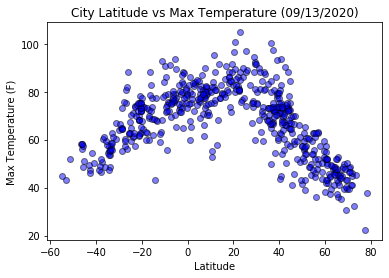

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


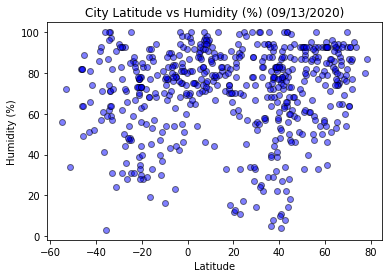

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


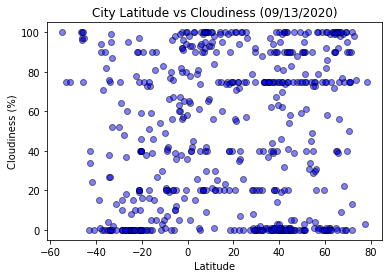

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


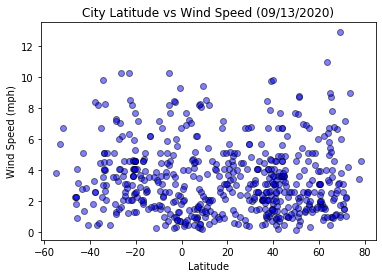

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.6x + 89.57
The r-squared is: -0.7660495813488157
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


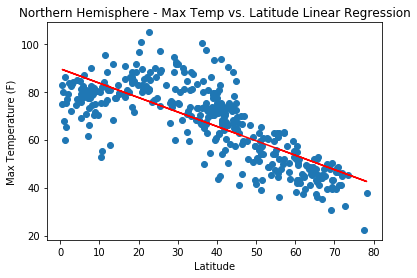

In [14]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 81.13
The r-squared is: 0.7578522600602308
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


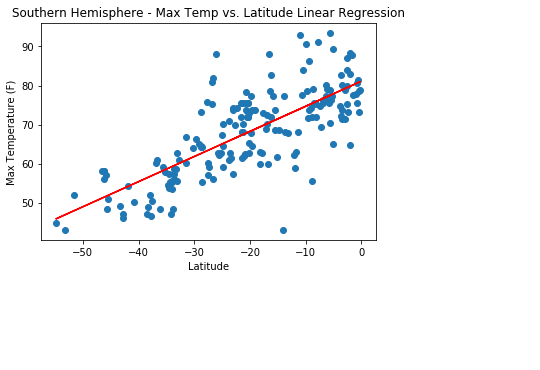

In [15]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 73.35
The r-squared is: -0.010652856550664573
The regression does not display much of a correlation between the data sets.


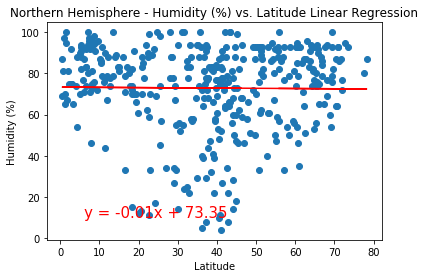

In [16]:

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 70.38
The r-squared is: 0.07707658303382833
The regression does not display much of a correlation between the data sets.


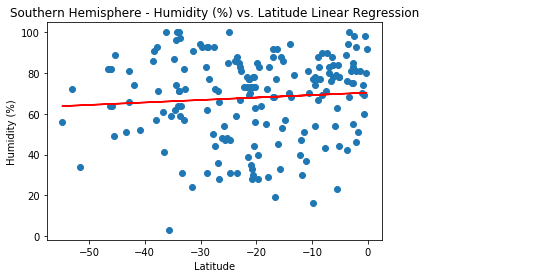

In [17]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 54.92
The r-squared is: -0.04634588068849027
The regression does not display much of a correlation between the data sets.


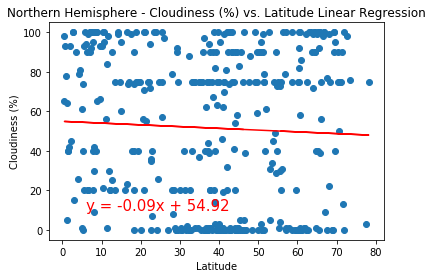

In [18]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.11x + 41.76
The r-squared is: 0.03934878056055826
The regression does not display much of a correlation between the data sets.


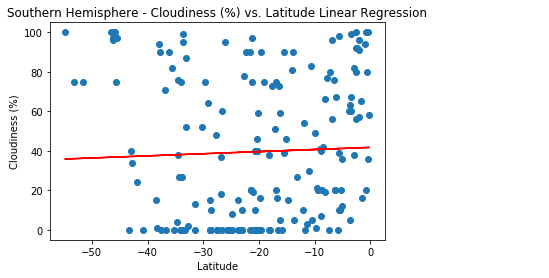

In [19]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.01
The r-squared is: 0.05671140267781248
The regression does not display much of a correlation between the data sets.


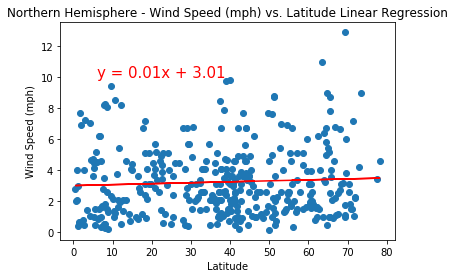

In [20]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 3.52
The r-squared is: -0.05263685589410862
The regression does not display much of a correlation between the data sets.


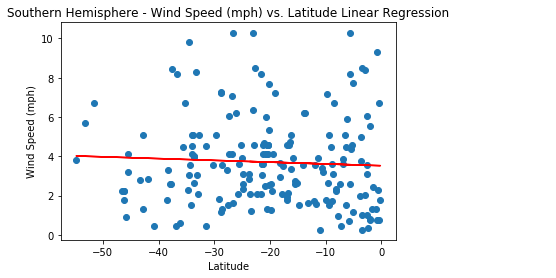

In [21]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()